In [10]:
import xarray as xr
from products.snow_cover_product import VIIRSMeteoFrancePrototype, VNP10A1, VJ110A1
from postprocess.general_purpose import open_reduced_dataset
from winter_year import WinterYear

wy = WinterYear(2023,2024)
analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_6/'
product_list = [VIIRSMeteoFrancePrototype(), VNP10A1(), VJ110A1()]
analyses_dict = {}
for product in product_list:
    analyses_dict.update({product.name: open_reduced_dataset(product=product, analysis_folder=analysis_folder, analysis_type='confusion_table')}) 
selection_dict = {k: v.sel(time=slice('2023-11','2024-06')).sel(altitude_bins=slice(900,None)) for k,v in analyses_dict.items()}

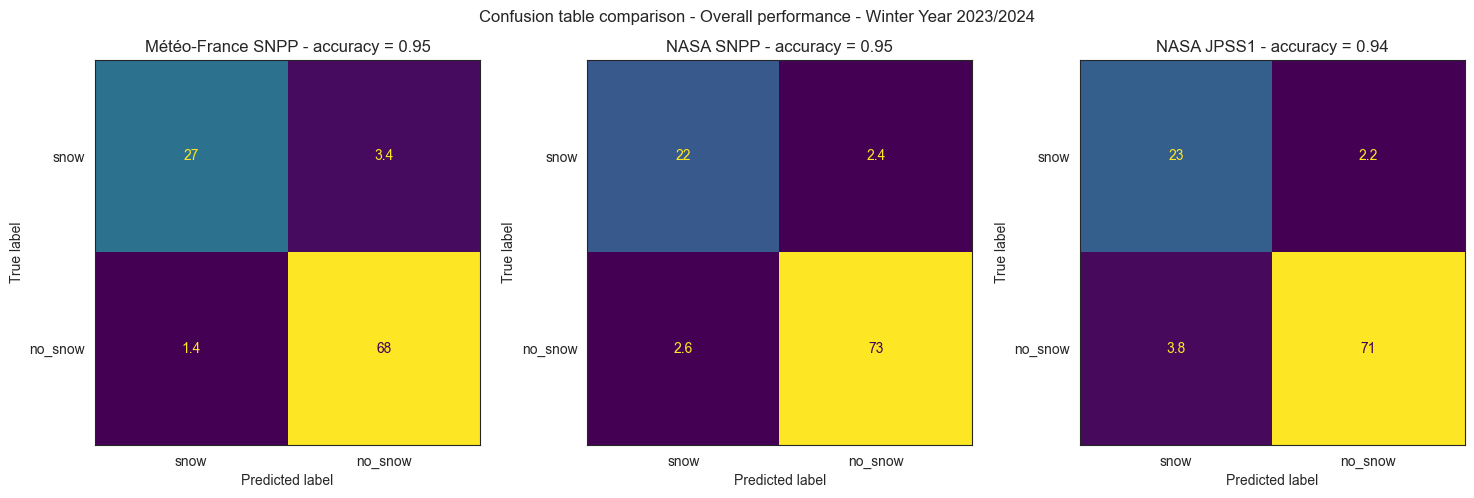

In [15]:
from postprocess.skill_scores import  plot_multiple_confusion_table
plot_multiple_confusion_table(metrics_dict=selection_dict, title_complement=f"Overall performance - {str(wy)}")

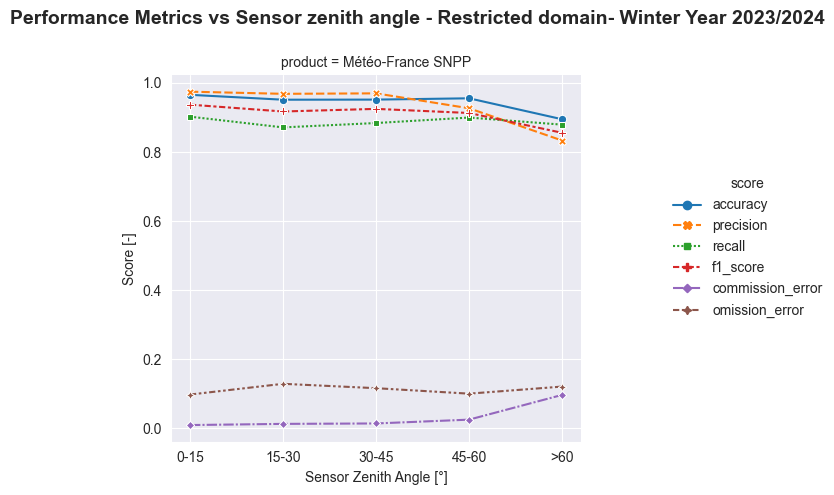

In [3]:
from postprocess.skill_scores import plot_multiple_scores_sns


selection_dict = {k: v.sel(altitude_bins=slice(900,None)).sel(time=slice('2023-11','2024-06')) for k,v in analyses_dict.items()}
selection_dict.pop('nasa_l3_snpp')
selection_dict.pop('nasa_l3_jpss1')
selection_dict = {k: v.sel(sensor_zenith_bins=slice(None, 75)).assign_coords({'sensor_zenith_bins': ['0-15', '15-30', '30-45', '45-60', '>60']}) for k,v in selection_dict.items()}
plot_multiple_scores_sns(metrics_dict=selection_dict, variable='sensor_zenith_bins', xlabel='Sensor Zenith Angle [°]',title_complement=f'Sensor zenith angle - Restricted domain- {str(wy)}')

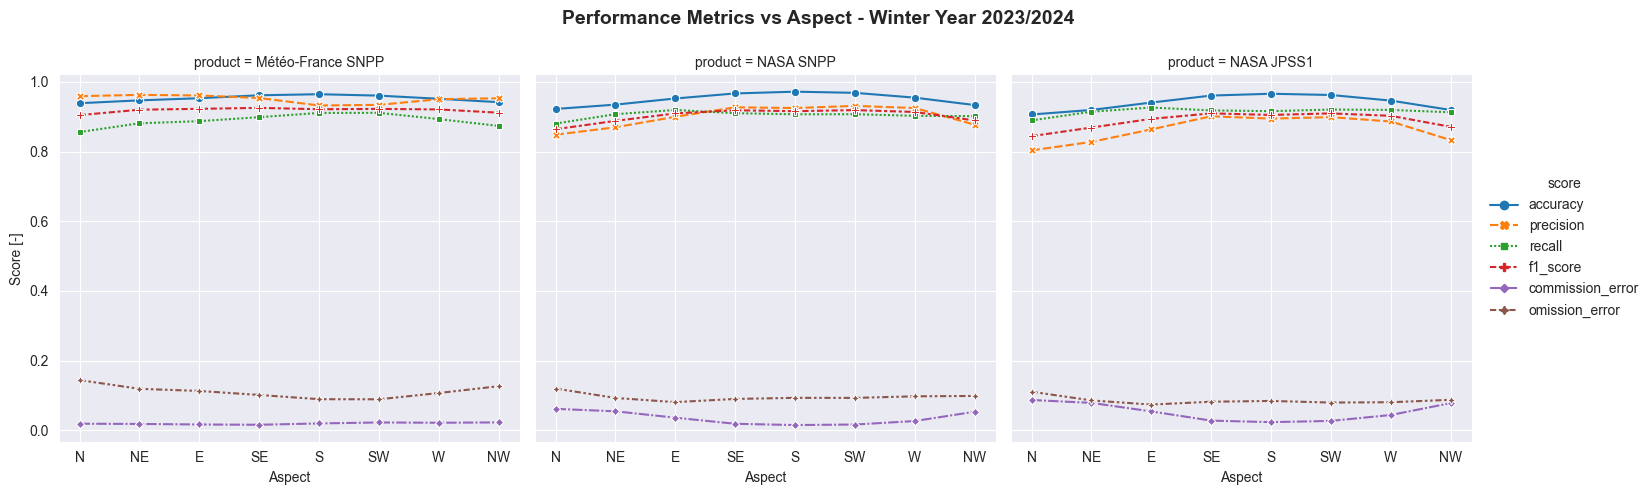

In [12]:
import pandas as pd
from reductions.statistics_base import EvaluationVsHighResBase
selection_dict = {k: v.sel(time=slice('2023-11','2024-06')).sel(altitude_bins=slice(900, None)) for k,v in analyses_dict.items()}
selection_dict = {k: v.assign_coords({'aspect_bins':pd.CategoricalIndex(data=EvaluationVsHighResBase.aspect_bins().labels, categories=EvaluationVsHighResBase.aspect_bins().labels, ordered=True)}) for k,v in selection_dict.items()}
plot_multiple_scores_sns(metrics_dict=selection_dict, variable='aspect_bins', xlabel='Aspect',title_complement=f'Aspect - {str(wy)}')


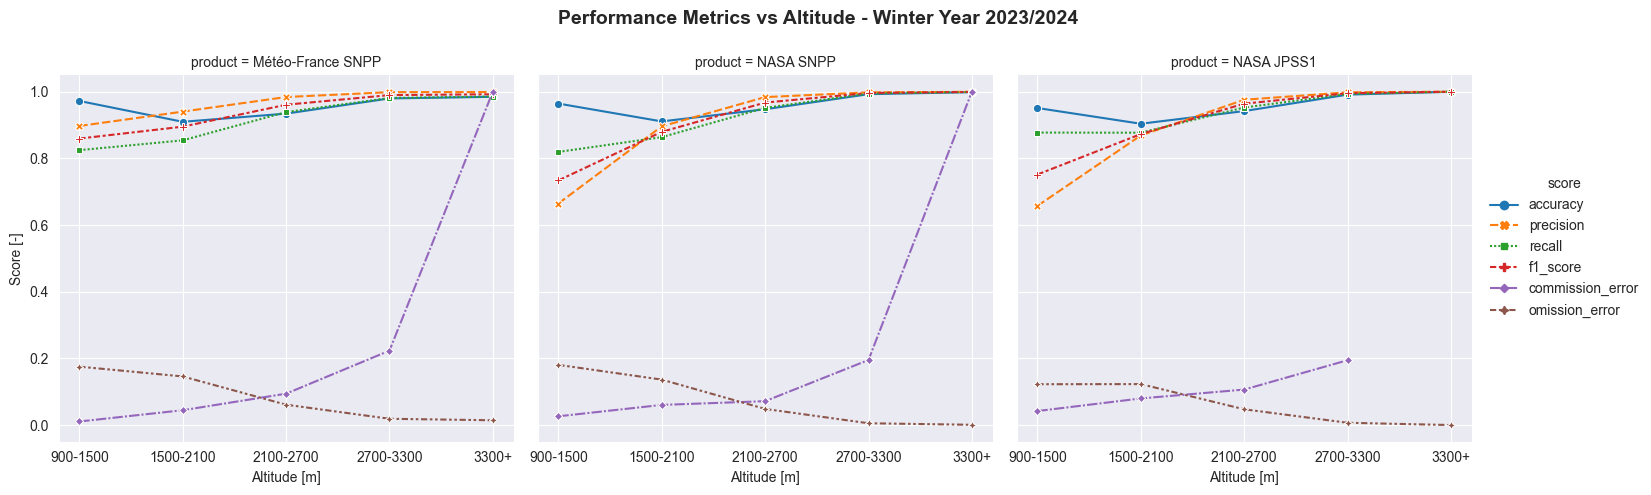

In [13]:
selection_dict = {k: v.assign_coords({'altitude_bins': pd.CategoricalIndex(data=[ '900-1500','1500-2100','2100-2700','2700-3300', '3300+'], categories=['900-1500','1500-2100','2100-2700','2700-3300', '3300+'], ordered=True)}) for k,v in selection_dict.items()}
plot_multiple_scores_sns(metrics_dict=selection_dict, variable='altitude_bins', xlabel='Altitude [m]',title_complement=f'Altitude - {str(wy)}')


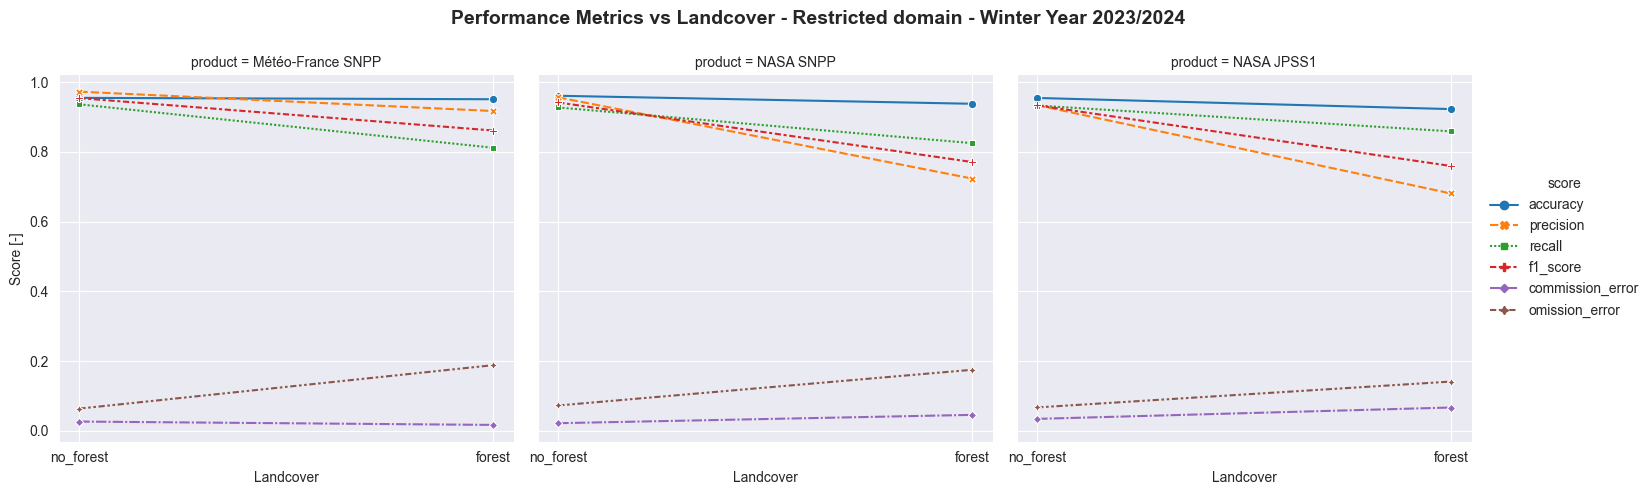

In [14]:
plot_multiple_scores_sns(metrics_dict=selection_dict, variable='forest_mask_bins', xlabel='Landcover',title_complement=f'Landcover - Restricted domain - {str(wy)}')

In [15]:
# from postprocess.skill_scores import compute_results_df, fancy_table
import pandas as pd

from postprocess.skill_scores import compute_results_df, fancy_table_skill_scores


df = compute_results_df(selection_dict)
print("General performance")
fancy_table_skill_scores(df)



General performance


product,accuracy,precision,recall,f1_score,commission_error,omission_error
meteofrance_no_forest_red_band_screen,0.95,0.95,0.89,0.92,0.02,0.11
nasa_l3_snpp,0.95,0.90,0.90,0.90,0.03,0.10
nasa_l3_jpss1,0.94,0.86,0.91,0.88,0.05,0.09


In [17]:
selection_dict = {k: v.sel(time=slice('2023-12', '2024-02')).sel(aspect_bins=['NE','N','NW']).sel(forest_mask_bins='forest',drop=True).sel(altitude_bins=slice(900,None)) for k,v in analyses_dict.items()}
df = compute_results_df(selection_dict)
print("Worst case scenario: accumulation period, north slopes, forest")
fancy_table_skill_scores(df)

Worst case scenario: accumulation period, north slopes, forest


product,accuracy,precision,recall,f1_score,commission_error,omission_error
meteofrance_no_forest_red_band_screen,0.91,0.94,0.81,0.87,0.03,0.19
nasa_l3_snpp,0.85,0.67,0.83,0.74,0.15,0.17
nasa_l3_jpss1,0.82,0.66,0.86,0.75,0.20,0.14


In [19]:
selection_dict = {k: v.sel(time=slice('2024-03', '2024-06')).sel(aspect_bins=['SE','S','SW']).sel(forest_mask_bins='no_forest',drop=True).sel(altitude_bins=slice(1500,None)) for k,v in analyses_dict.items()}
df = compute_results_df(selection_dict)
print("Best case scenario: ablation period, south slopes <30°, no forest")
fancy_table_skill_scores(df)

Best case scenario: ablation period, south slopes <30°, no forest


product,accuracy,precision,recall,f1_score,commission_error,omission_error
meteofrance_no_forest_red_band_screen,0.93,0.95,0.93,0.94,0.07,0.07
nasa_l3_snpp,0.94,0.95,0.91,0.93,0.03,0.09
nasa_l3_jpss1,0.93,0.93,0.90,0.91,0.05,0.10
